# Test numerical integrators on an almost critical null geodesic in Schwarzschild spacetime

In [1]:
version()

'SageMath version 9.0.beta4, Release Date: 2019-11-02'

In [2]:
%display latex

## Schwarzschild metric

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
# X.<t, r, th, ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
X.<t, r, th, ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.metric()
m = 1
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2/r - 1) dt*dt - 1/(2/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [5]:
Xcart.<t, x, y, z> = M.chart()
X_to_Xcart = X.transition_map(Xcart, [t, r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
X_to_Xcart.display()

t = t
x = r*cos(ph)*sin(th)
y = r*sin(ph)*sin(th)
z = r*cos(th)

In [6]:
M.top_charts()

[Chart (M, (t, r, th, ph)), Chart (M, (t, x, y, z))]

In [7]:
M._top_charts = [X]
M.top_charts()

[Chart (M, (t, r, th, ph))]

In [8]:
M.identity_map().coord_functions(X, Xcart)

Coordinate functions (t, r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th)) on the Chart (M, (t, r, th, ph))

## A null geodesic with an impact parameter close to critical

We consider a null geodesic in the equatorial plane $\theta=\pi/2$ arising from far away of the black hole with an impact parameter very close to the critical value $b_c = 3\sqrt{3} m$:

In [9]:
bc = 3*sqrt(3)
n(bc)

5.19615242270663

In [10]:
b = 5.196155
n(b - bc)

2.57729336805568e-6

We introduce a function to compute the initial tangent vector from the value of $b$, the conserved energy $E$ and the coordinates $(r_0,\varphi_0)$ of the initial point:

In [11]:
def initial_vector(r0, b, ph0=0, E=1, inward=False):
    t0, th0 = 0, pi/2
    L = b*E
    vt0 = 1/(1-2*m/r0)
    vr0 = sqrt(E^2 - L^2/r0^2*(1-2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = L / r0^2
    p0 = M((t0, r0, th0, ph0), name='p_0')
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

In [12]:
r0 = 15  # distance of the source

### Using odeint

CPU time in solve(): 0.026593446731567383 s


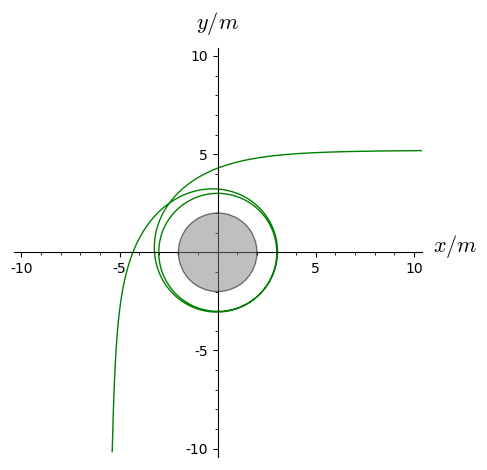

In [13]:
import time
graph = circle((0, 0), 2*m, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
ph0 = asin(b/r0)
v0 = initial_vector(r0, b, ph0=ph0, inward=True)
s = var('s')
geod0 = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
#sol = geod0.solve(step=0.1, method="odeint") 
sol = geod0.solve(step=0.1, method="odeint", rtol=1.e-12, atol=1.e-12) 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod0.interpolate()   
graph += geod0.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                               aspect_ratio=1, color='green') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

### Comparison with rkf45

CPU time in solve(): 4.370987176895142 s


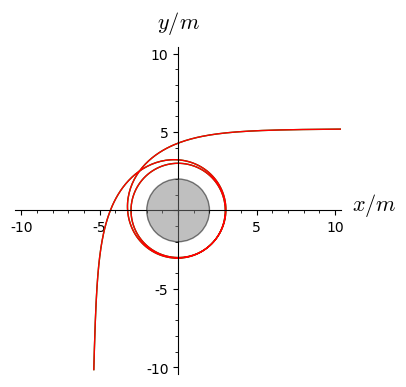

In [14]:
geod1 = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod1.solve(step=0.1, method="rkf45") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod1.interpolate()   
graph += geod1.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                               aspect_ratio=1, color='red') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

In [15]:
# graph.save('test_geod.pdf', xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

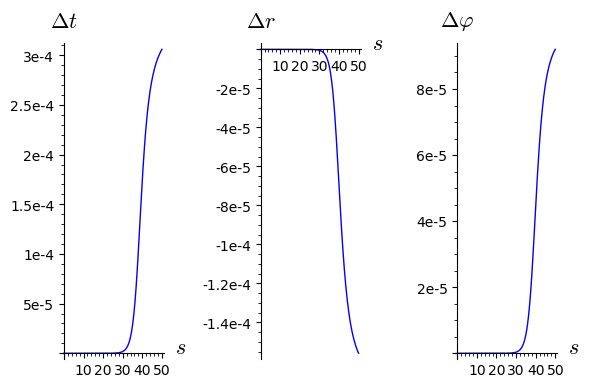

In [16]:
graphics_array([plot(lambda s: X(geod0(s))[0] -  X(geod1(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod0(s))[1] -  X(geod1(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod0(s))[3] -  X(geod1(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])

Comparison with `step=0.02` instead of `0.1`:

CPU time in solve(): 21.649514198303223 s


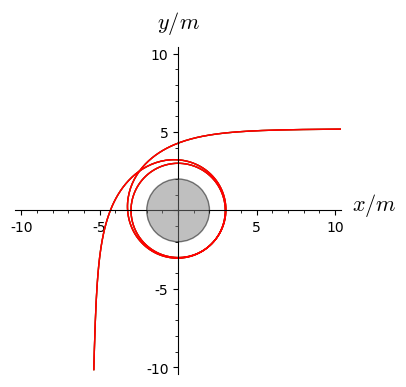

In [17]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod.solve(step=0.02, method="rkf45") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='red') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

Comparison of the two rkf45 methods, one with `step=0.02` and the otjer with `step=0.1`:

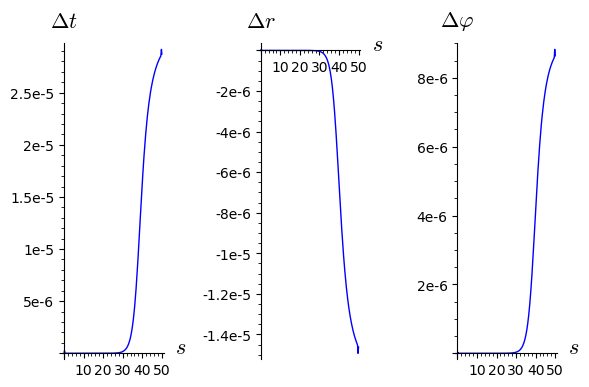

In [18]:
graphics_array([plot(lambda s: X(geod(s))[0] -  X(geod1(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod(s))[1] -  X(geod1(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod(s))[3] -  X(geod1(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])

### Comparison with rk4_maxima

CPU time in solve(): 13.302617311477661 s


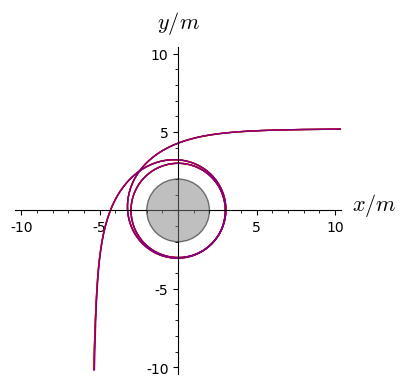

In [19]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod.solve(step=0.1, method="rk4_maxima") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='purple') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

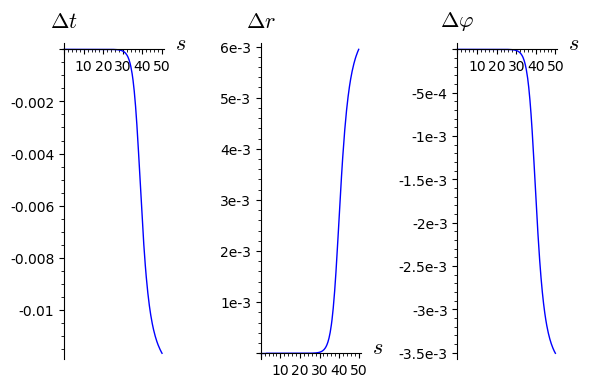

In [20]:
graphics_array([plot(lambda s: X(geod0(s))[0] -  X(geod(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod0(s))[1] -  X(geod(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod0(s))[3] -  X(geod(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])

### Comparison with gear2

CPU time in solve(): 22.341139554977417 s


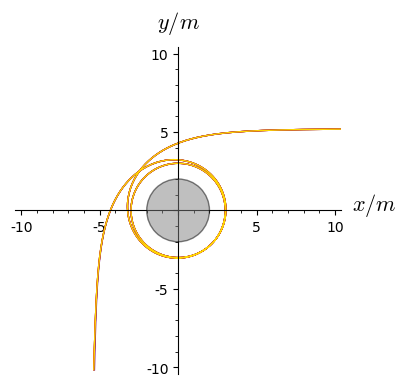

In [21]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod.solve(step=0.1, method="gear2") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='gold') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

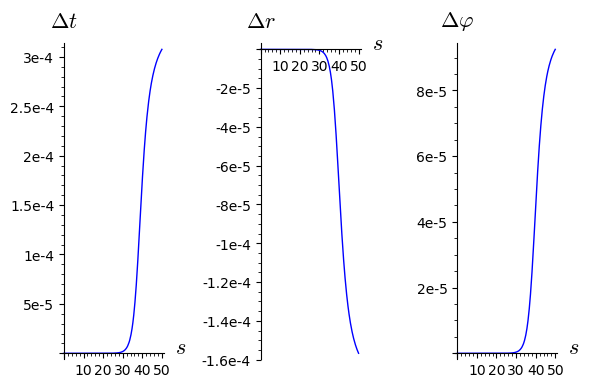

In [22]:
graphics_array([plot(lambda s: X(geod0(s))[0] -  X(geod(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod0(s))[1] -  X(geod(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod0(s))[3] -  X(geod(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])

### Comparison with rk4

CPU time in solve(): 7.399372816085815 s


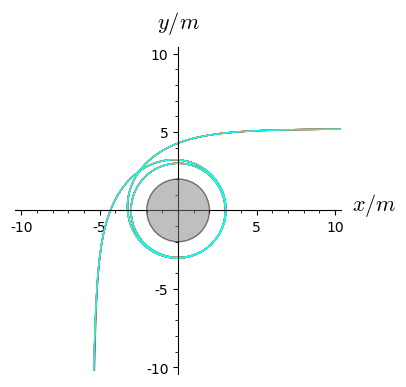

In [23]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod.solve(step=0.1, method="rk4") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='cyan') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

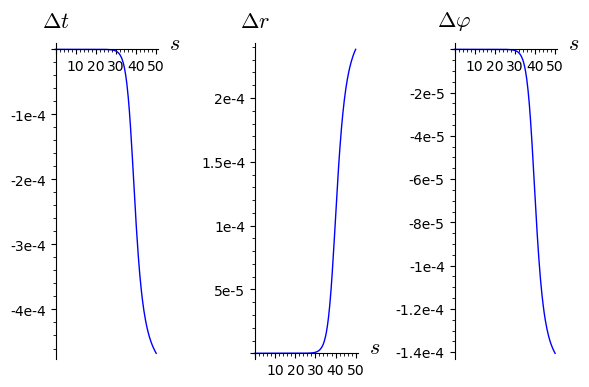

In [24]:
graphics_array([plot(lambda s: X(geod0(s))[0] -  X(geod(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod0(s))[1] -  X(geod(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod0(s))[3] -  X(geod(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])

### Comparison with dopri5

CPU time in solve(): 0.07653164863586426 s


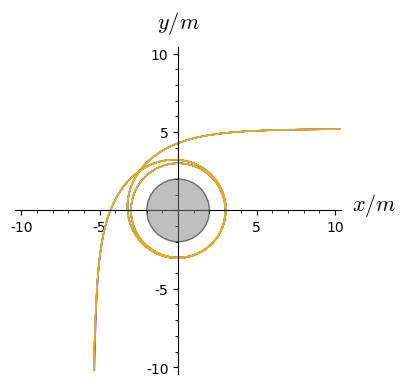

In [25]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
time0 = time.time()
sol = geod.solve(step=0.1, method="dopri5") 
print("CPU time in solve(): {} s".format(time.time() - time0))
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='orange') 
show(graph, xmin=-10, xmax=10, ymin=-10, ymax=10, axes_labels=[r'$x/m$', r'$y/m$'])

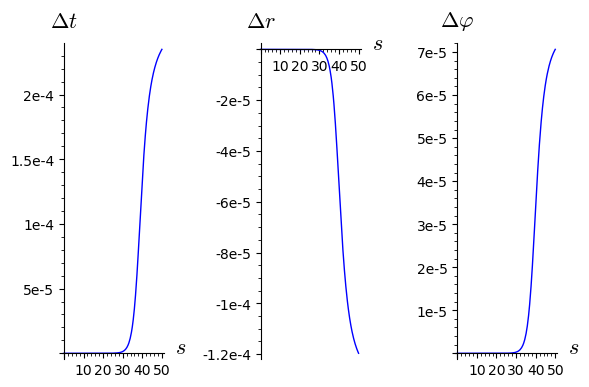

In [26]:
graphics_array([plot(lambda s: X(geod0(s))[0] -  X(geod(s))[0], (0, 50), 
                     axes_labels=['$s$', r'$\Delta t$']),
                plot(lambda s: X(geod0(s))[1] -  X(geod(s))[1], (0, 50), 
                     axes_labels=['$s$', r'$\Delta r$']),
                plot(lambda s: X(geod0(s))[3] -  X(geod(s))[3], (0, 50), 
                     axes_labels=['$s$', r'$\Delta \varphi$'])])